## Experiments with Discrete Cosine Transform

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Image Tensor Shape: (32, 32, 3)


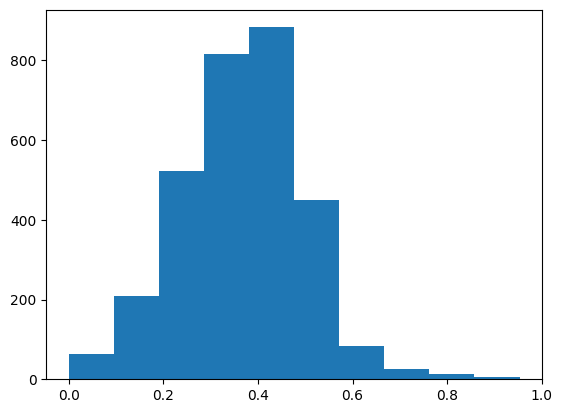

In [112]:
# Load the PNG image using Pillow
image_path = "../assets/cifar_sample.jpg"
image = Image.open(image_path)

# Convert the image to a NumPy array (tensor)
img = np.array(image)

# Print the shape of the image tensor
print("Image Tensor Shape:", img.shape)

# Optionally, you can normalize the pixel values to be between 0 and 1
img = img / 255.0

# img = torch.randn(28, 28).flatten()
plt.hist(img.flatten())
plt.show()

In [113]:
import numpy as np
from scipy.fftpack import dct, idct

# Step 1: Create a 3D tensor (image with three color channels)
# image = np.random.rand(28, 28, 3)  # Replace this with your actual image data

# Step 2: Apply 2D DCT to each channel
# img = img / 255.0
dct_image = np.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    dct_image[:, :, i] = dct(dct(img[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

# Step 3: Print the transformed image
print("Transformed Image:")
print(dct_image)

# Step 4: Apply the inverse 2D DCT to each channel to get the original image back
original_image = np.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    original_image[:, :, i] = idct(idct(dct_image[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

# Step 5: Print the original image
print("\nOriginal Image:")
print(original_image)

Transformed Image:
[[[ 1.41871324e+01  1.20863971e+01  8.99497549e+00]
  [-9.50936581e-01 -8.93677618e-01 -1.05826469e+00]
  [ 5.01685469e-01  2.58114423e-01 -4.26398262e-01]
  ...
  [-1.36521016e-03 -7.05308448e-03  2.17882955e-03]
  [ 9.28518618e-05  7.52475076e-03  2.32030513e-03]
  [ 3.48377491e-02  2.45452234e-02  4.37063991e-02]]

 [[-6.69492394e-01 -4.82049234e-01 -1.33098875e+00]
  [-8.20843428e-01 -8.84696781e-01 -1.34372748e+00]
  [-1.14844229e-01 -1.14525313e-02  4.46487832e-01]
  ...
  [ 1.30075190e-02  1.09825835e-02  1.42743506e-02]
  [-1.11587932e-03  5.24991910e-04  2.28156128e-03]
  [ 5.64397699e-03  7.50792079e-03  9.52873664e-03]]

 [[-7.72019551e-01 -2.14182868e-01  2.25252649e-01]
  [ 3.26929548e-01  3.79015421e-01  8.30084544e-01]
  [ 3.02402457e-01  3.27321154e-01  1.63498865e-01]
  ...
  [-6.38148707e-03 -7.38999847e-03 -1.34240135e-02]
  [-8.09376000e-03 -6.14169759e-04 -7.57336054e-03]
  [-7.90063355e-03 -9.69991060e-03 -7.95481142e-03]]

 ...

 [[ 5.65536969e

(array([ 64., 208., 522., 816., 883., 449.,  83.,  27.,  14.,   6.]),
 array([0.        , 0.09529412, 0.19058824, 0.28588235, 0.38117647,
        0.47647059, 0.57176471, 0.66705882, 0.76235294, 0.85764706,
        0.95294118]),
 <BarContainer object of 10 artists>)

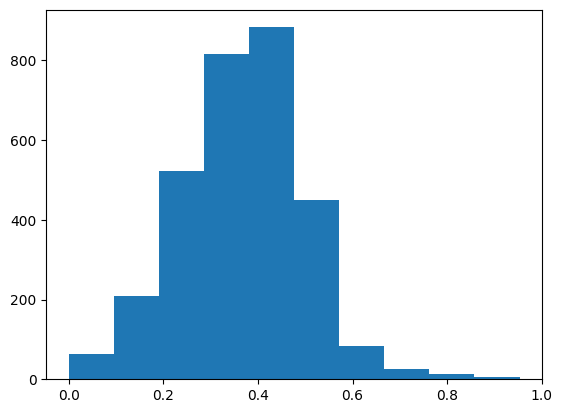

In [114]:
plt.hist(img.flatten())

In [115]:
print(dct_image[dct_image > 1])

[14.18713235 12.08639706  8.99497549  1.04737079]


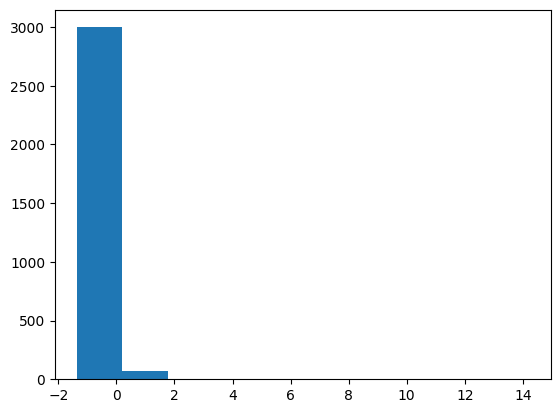

In [116]:
channel = 0
channel_sample = dct_image[:,:,channel]

plt.hist(dct_image.flatten())
plt.show()

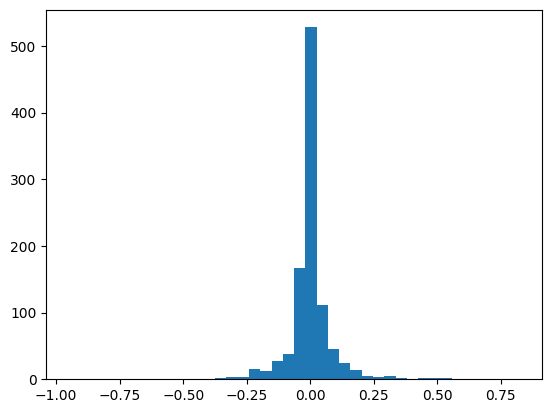

In [91]:
plt.hist(channel_sample[channel_sample < 1], bins=40)
plt.show()

[14.18713235]


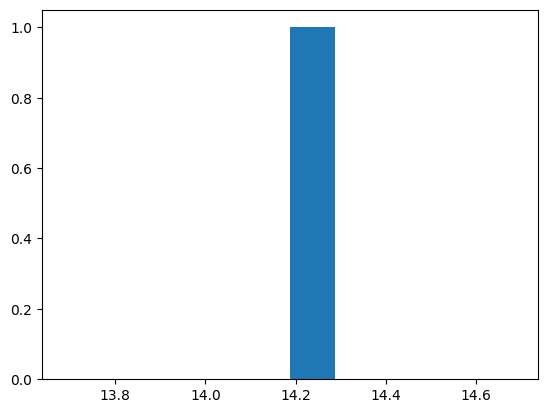

In [125]:
# That's actually a lot of sparsity!
plt.hist(channel_sample[channel_sample > 1])
print(channel_sample[channel_sample > 1])
plt.show()

## Experiment with sparse tensors

In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# from scipy.fftpack import dct, idct
from torch_utils.dct import dct2, idct2

In [21]:
# Load the PNG image using Pillow
#image_path = "../assets/cifar_sample.jpg"
# image_path = "../assets/celeba_sample.jpg"
image_path = "../assets/celeba_sample2.jpg"

img = Image.open(image_path)
img = np.array(img)
img = img / 255.0

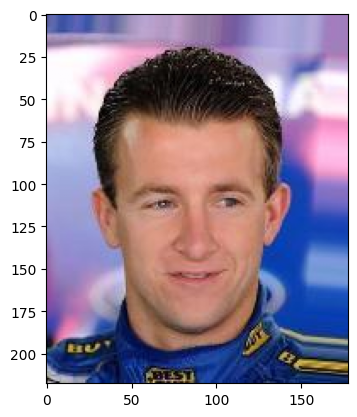

In [3]:
plt.imshow(img)
plt.show()

In [16]:
# try with eigenwerten/svd

## DCT with scipy

In [75]:
dct_image = np.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    dct_image[:, :, i] = dct(dct(img[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

#dct_image = dct(img)

dct_image_backup = dct_image.copy()

## DCT with pytorch

In [4]:
img = torch.tensor(img)
dct_image = torch.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    dct_image[:, :, i] = dct2(img[:, :, i])

#dct_image = dct(torch.tensor(img))  # not sure what this does? transform over all channels or individually?

dct_image_backup = dct_image.clone().detach()

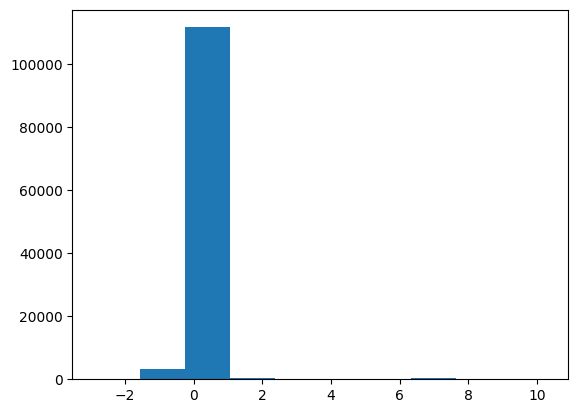

In [93]:
# scipy
plt.hist(dct_image.flatten())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


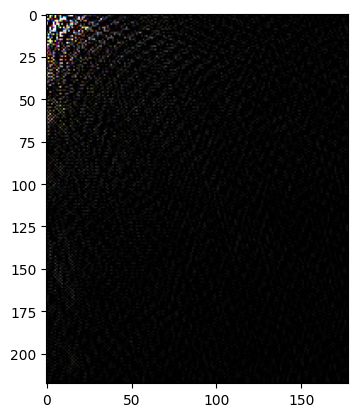

In [5]:
plt.imshow(dct_image)
plt.show()

In [11]:
# Set values below threshold to 0
threshold = 0.02

dct_image = dct_image_backup
dct_image[(dct_image > -threshold) & (dct_image < threshold)] = 0

In [12]:
# Count zero pixels
nr_pixels = img.flatten().shape[0]
non_zero_dct = dct_image[dct_image != 0].shape[0]
print(nr_pixels)
print(non_zero_dct)
print("Sparsity ratio:", 1 - non_zero_dct / nr_pixels)

116412
72730
Sparsity ratio: 0.3752362299419304


In [ ]:
# write a transformation as a class in the dataloader -> dct on GPU

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


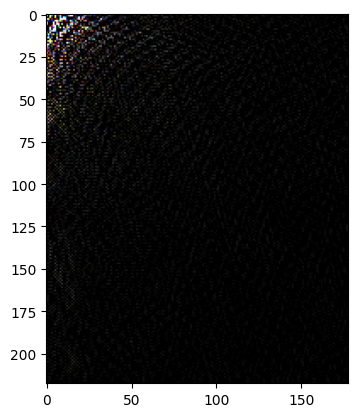

In [15]:
plt.imshow(dct_image)
plt.show()

In [25]:
# Reconstruct image (SCIPY)
rec_image = np.zeros_like(img)
for i in range(img.shape[-1]):  # Iterate over color channels
    rec_image[:, :, i] = idct(idct(dct_image[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

In [17]:
# Reconstruct image (TORCH)
rec_image = np.zeros_like(img)
for i in range(img.shape[-1]):  # Iterate over color channels
    rec_image[:, :, i] = idct2(dct_image[:, :, i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


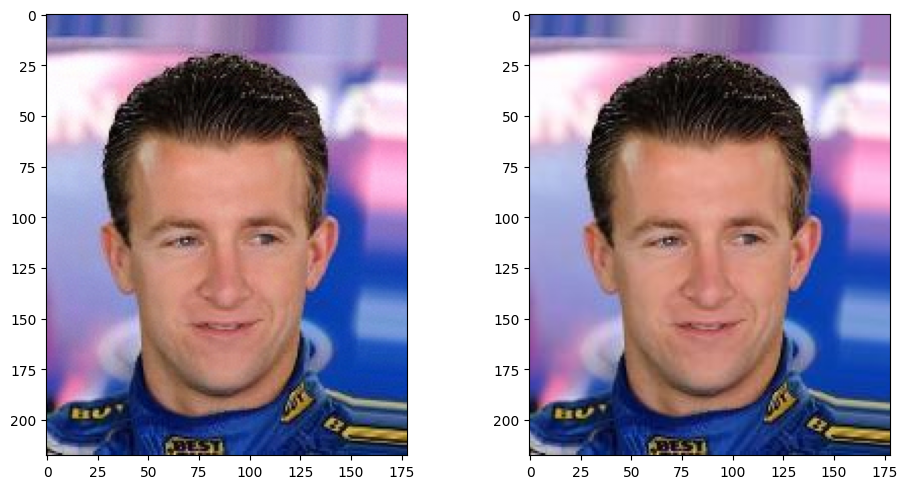

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(rec_image)
axes[1].imshow(img)
plt.tight_layout()
plt.show()

In [290]:
# Try sparse representations for pytorch
dct_image_torch = torch.tensor(dct_image)
dct_image_torch = dct_image_torch.unsqueeze(0).float()
dct_image_torch = dct_image_torch.permute(0,3,1,2)

dct_image_torch_sparse = dct_image_torch.to_sparse_coo()

In [319]:
# Test if sparse matrix works with conv
dct_image_torch = dct_image_torch_sparse

m1 = torch.nn.Conv2d(dct_image_torch.shape[1], 16, 3, stride=2)
output1 = m1(dct_image_torch)
print(output1.shape)

RuntimeError: Tensors of type SparseTensorImpl do not have is_contiguous